# Part I - Prosper Loan Exploratory Analysis 
## by Sheriff Opeyemi Afolabi

## Introduction

LoanDataFromProsper dataset contains 113,937 rows or records each with 81 columns among which are the following: 

**BorrowerState**: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

**Occupation**: The Occupation selected by the Borrower at the time they created the listing.

**EmploymentStatus**: The employment status of the borrower at the time they posted the listing.

**EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.

**BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.

**BorrowerRate**: The Borrower's interest rate for this loan. 

**IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

**IncomeRange**: The income range of the borrower at the time the listing was created.

**StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.

**ListingCategory**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 
1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 
8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 
14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

**ListingCreationDate**: The date the listing was created.

**MemberKey**: The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 

**LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

**Term**: The length of the loan expressed in months.

**ClosedDate**: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 

**LenderYield**: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

**ProsperRating (numeric)**: The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

**ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

**Investors**: The number of investors that funded the loan.

**LP_InterestandFees**: Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.

**LP_ServiceFees**: Cumulative service fees paid by the investors who have invested in the loan. 

**Recommendations**: Number of recommendations the borrower had at the time the listing was created.

**InvestmentFromFriendsAmount**: Dollar amount of investments that were made by friends.

## Preliminary Wrangling


In [206]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [207]:
# load in the dataset into a pandas DataFrame
loanData = pd.read_csv('prosperLoanData.csv')

#### Selecting Features of interest

In [208]:
features = ['EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 
            'CurrentlyInGroup', 'Term', 'ListingCreationDate', 'DebtToIncomeRatio', 
            'BorrowerState', 'LoanStatus', 'LoanOriginalAmount',
            'LoanOriginationQuarter', 'LenderYield', 'ProsperRating (numeric)', 
          'BorrowerAPR', 'BorrowerRate']

loanData = loanData[features]

## Data Assessment

In [209]:
# high-level overview of data shape and composition
print(loanData.shape)
print(loanData.dtypes)
print(loanData.sample())

(113937, 15)
EmploymentStatus            object
IsBorrowerHomeowner           bool
IncomeRange                 object
CurrentlyInGroup              bool
Term                         int64
ListingCreationDate         object
DebtToIncomeRatio          float64
BorrowerState               object
LoanStatus                  object
LoanOriginalAmount           int64
LoanOriginationQuarter      object
LenderYield                float64
ProsperRating (numeric)    float64
BorrowerAPR                float64
BorrowerRate               float64
dtype: object
      EmploymentStatus  IsBorrowerHomeowner     IncomeRange  CurrentlyInGroup  \
96537         Employed                 True  $75,000-99,999             False   

       Term            ListingCreationDate  DebtToIncomeRatio BorrowerState  \
96537    60  2014-02-19 19:23:32.830000000               0.18            CT   

      LoanStatus  LoanOriginalAmount LoanOriginationQuarter  LenderYield  \
96537    Current               20000              

In [210]:
# dataset information
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   EmploymentStatus         111682 non-null  object 
 1   IsBorrowerHomeowner      113937 non-null  bool   
 2   IncomeRange              113937 non-null  object 
 3   CurrentlyInGroup         113937 non-null  bool   
 4   Term                     113937 non-null  int64  
 5   ListingCreationDate      113937 non-null  object 
 6   DebtToIncomeRatio        105383 non-null  float64
 7   BorrowerState            108422 non-null  object 
 8   LoanStatus               113937 non-null  object 
 9   LoanOriginalAmount       113937 non-null  int64  
 10  LoanOriginationQuarter   113937 non-null  object 
 11  LenderYield              113937 non-null  float64
 12  ProsperRating (numeric)  84853 non-null   float64
 13  BorrowerAPR              113912 non-null  float64
 14  Borr

In [211]:
# Dataset description
loanData.describe()

,Term,DebtToIncomeRatio,LoanOriginalAmount,LenderYield,ProsperRating (numeric),BorrowerAPR,BorrowerRate
count,113937.000000,105383.000000,113937.00000,113937.000000,84853.000000,113912.000000,113937.000000
mean,40.830248,0.275947,8337.01385,0.182701,4.072243,0.218828,0.192764
std,10.436212,0.551759,6245.80058,0.074516,1.673227,0.080364,0.074818
min,12.000000,0.000000,1000.00000,-0.010000,1.000000,0.006530,0.000000
25%,36.000000,0.140000,4000.00000,0.124200,3.000000,0.156290,0.134000
50%,36.000000,0.220000,6500.00000,0.173000,4.000000,0.209760,0.184000
75%,36.000000,0.320000,12000.00000,0.240000,5.000000,0.283810,0.250000
max,60.000000,10.010000,35000.00000,0.492500,7.000000,0.512290,0.497500


In [212]:
# Dislays number of unique values of each column
loanData.nunique()

EmploymentStatus                8
IsBorrowerHomeowner             2
IncomeRange                     8
CurrentlyInGroup                2
Term                            3
ListingCreationDate        113064
DebtToIncomeRatio            1207
BorrowerState                  51
LoanStatus                     12
LoanOriginalAmount           2468
LoanOriginationQuarter         33
LenderYield                  2283
ProsperRating (numeric)         7
BorrowerAPR                  6677
BorrowerRate                 2294
dtype: int64

In [213]:
# Displays count of mising values in each column
loanData.isnull().sum()

EmploymentStatus            2255
IsBorrowerHomeowner            0
IncomeRange                    0
CurrentlyInGroup               0
Term                           0
ListingCreationDate            0
DebtToIncomeRatio           8554
BorrowerState               5515
LoanStatus                     0
LoanOriginalAmount             0
LoanOriginationQuarter         0
LenderYield                    0
ProsperRating (numeric)    29084
BorrowerAPR                   25
BorrowerRate                   0
dtype: int64

In [214]:
# Percentage of missing values by column
loanData.isnull().sum()/loanData.shape[0] * 100

EmploymentStatus            1.979164
IsBorrowerHomeowner         0.000000
IncomeRange                 0.000000
CurrentlyInGroup            0.000000
Term                        0.000000
ListingCreationDate         0.000000
DebtToIncomeRatio           7.507658
BorrowerState               4.840394
LoanStatus                  0.000000
LoanOriginalAmount          0.000000
LoanOriginationQuarter      0.000000
LenderYield                 0.000000
ProsperRating (numeric)    25.526387
BorrowerAPR                 0.021942
BorrowerRate                0.000000
dtype: float64

## Issues


1. ListingCreationDate has string datatype denoted by object

2. The columns listed below contain missing values:

    - EmploymentStatus
    - DebtToIncomeRatio 
    - ProsperRating (numeric)

3. ProsperRating (numeric) has float64 datatype 

4. Feature Engineering

## Data Cleaning

In [215]:
# make a copy of the dataset
cleaned_df = loanData.copy()

#### Define

Convert the datatype of ListingCreationDate column from string to a datetime datatype

#### Code

In [216]:
cleaned_df['ListingCreationDate'] = pd.to_datetime(cleaned_df['ListingCreationDate'])

#### Test 

In [217]:
print(cleaned_df.dtypes)

EmploymentStatus                   object
IsBorrowerHomeowner                  bool
IncomeRange                        object
CurrentlyInGroup                     bool
Term                                int64
ListingCreationDate        datetime64[ns]
DebtToIncomeRatio                 float64
BorrowerState                      object
LoanStatus                         object
LoanOriginalAmount                  int64
LoanOriginationQuarter             object
LenderYield                       float64
ProsperRating (numeric)           float64
BorrowerAPR                       float64
BorrowerRate                      float64
dtype: object


#### Define

Fill the missing values with mean and "unknown" string as appropriate

#### Code

In [218]:
def replace_wt_mean(df, features_list):
    for feature in features_list:
        df[feature] = df[feature].fillna(df[feature].mean())
    return df

In [219]:
# Filling the missing values in columns ProsperRating (numeric), EmploymentStatusDuration and DebtToIncomeRatio with mean
cleaned_df = replace_wt_mean(cleaned_df, ['ProsperRating (numeric)', 
                                          'DebtToIncomeRatio', 'BorrowerAPR'])

In [220]:
def replace_with_unknown(df, features_list):
    for feature in features_list:
        df[feature] = df[feature].fillna('Unknown')
    return df

In [221]:
# Filling the missing values in columns EmploymentStatus, Occupation,BorrowerState and ProsperRating (Alpha) with 'Unknown'
cleaned_df = replace_with_unknown(cleaned_df, ['EmploymentStatus', 'BorrowerState'])

#### Test

In [222]:
cleaned_df.isnull().sum()

EmploymentStatus           0
IsBorrowerHomeowner        0
IncomeRange                0
CurrentlyInGroup           0
Term                       0
ListingCreationDate        0
DebtToIncomeRatio          0
BorrowerState              0
LoanStatus                 0
LoanOriginalAmount         0
LoanOriginationQuarter     0
LenderYield                0
ProsperRating (numeric)    0
BorrowerAPR                0
BorrowerRate               0
dtype: int64

In [223]:
cleaned_df.shape

(113937, 15)

#### Define

Convert datatype of ProsperRating (numeric) from float64 to int64 

#### Code

In [224]:
cleaned_df['ProsperRating (numeric)'] = cleaned_df['ProsperRating (numeric)'].astype('int64')

#### Test

In [225]:
cleaned_df.dtypes

EmploymentStatus                   object
IsBorrowerHomeowner                  bool
IncomeRange                        object
CurrentlyInGroup                     bool
Term                                int64
ListingCreationDate        datetime64[ns]
DebtToIncomeRatio                 float64
BorrowerState                      object
LoanStatus                         object
LoanOriginalAmount                  int64
LoanOriginationQuarter             object
LenderYield                       float64
ProsperRating (numeric)             int64
BorrowerAPR                       float64
BorrowerRate                      float64
dtype: object

## Feature Engineering

In [226]:
# Creating two additional columns for ListingCreationYear and ListingCreationMonth and picking Date ONLY for ListingCreationDate
cleaned_df['ListingCreationYear'] = cleaned_df.ListingCreationDate.dt.year
cleaned_df['ListingCreationMonth'] = cleaned_df.ListingCreationDate.dt.month
cleaned_df['ListingCreationDate'] = cleaned_df.ListingCreationDate.dt.date

In [227]:
# Converting the new ListingCreationDate into a datetime datatype 
cleaned_df['ListingCreationDate'] = pd.to_datetime(cleaned_df['ListingCreationDate'])

In [228]:
# showing unique values of ListingCreationMonth column
cleaned_df['ListingCreationMonth'].unique()

array([ 8,  2,  1, 10,  9, 12,  4,  5,  7, 11,  6,  3], dtype=int64)

In [229]:
# Convert the datatype of ListingCreationMonth to str datatype
cleaned_df['ListingCreationMonth'] = cleaned_df['ListingCreationMonth'].astype(str)

In [230]:
# Replacing numerical values of Month with name of months

cleaned_df['ListingCreationMonth'].replace(
    ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True
    )

In [231]:
cleaned_df['ListingCreationMonth'].unique()

array(['Aug', 'Feb', 'Jan', 'Oct', 'Sep', 'Dec', 'Apr', 'May', 'Jul',
       'Nov', 'Jun', 'Mar'], dtype=object)

### What is the structure of your dataset?

My dataset contains 113937 records with 81 features. Most of these features are stated in the introductory section above. For the sake  of my investigation and analysis, I have chosen 15 features to work with.

### What is/are the main feature(s) of interest in your dataset?

Putting myself in the possition of a potential borrower, I'm interested in knowing the following:

1. The interest rate of the loan that is, BorrowerRate. Its spread and how it relates to Borrower's Ananual Percentage Rate BorrowerAPR 

2. What factors affect the BorrowerRate as well as the BorrowerAPR

3. What factors affect loan’s outcome status?

4. What term of loan is most popular?

5. What year and month has the highest listing creation?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that borrower's information such as EmploymentStatus, IsBorrowerHomeowner, IncomeRange, CurrentlyInGroup, Term, and ListingCreationDate will have effects in determining the LoanStatus. For example lenders would prefer to give loan to somebody who has a job with good pay than somebody without a job or with a poorly paid job.


I equally expect that features such as Term and LoanOriginalAmount will have effects on the interest rate. For instance the amount of loan as well as the length of time matters. 




## Univariate Exploration

In [232]:
# plots polishing function

def plt_plot_function(plt, title, xlabel, ylabel):
    """
    This simple finction helps in polishing visualizations
    
    Parameters
        ----------
        plt : matplotlib shortened as plt.
            
        title : str
        
        xlabel : str
        
        ylabel : str    
    """
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
  

### Loan Status

Let us see the proportion of Loan Status in percentage.

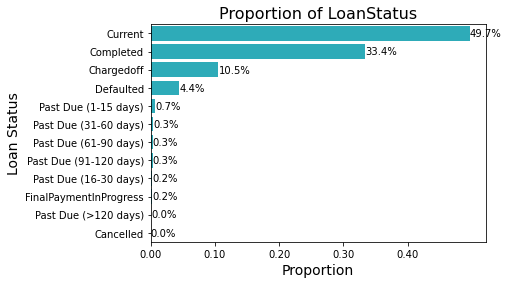

In [233]:
LoanStatus_count = cleaned_df.LoanStatus.value_counts()
LoanStatus_order = LoanStatus_count.index


# Returns the sum of all not-null values in `LoanStatus` column
n_loan = cleaned_df.LoanStatus.shape[0]


# Return the highest frequency in the `LoanStatus` column
max_LoanStatus_count = LoanStatus_count[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_LoanStatus_count/n_loan



# Use numpy.arange() function to produce a set of evenly spaced proportioned values between 0 and max_prop, with a step size 10%

tick_props = np.arange(0, max_prop, 0.1)

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names


default_color = sns.color_palette()[9]

sns.countplot(data=cleaned_df,y='LoanStatus',color=default_color,order=LoanStatus_order);

# Change the tick locations and labels
plt.xticks(tick_props*n_loan, tick_names);

# polishing plots
plt_plot_function(plt, 'Proportion of LoanStatus','Proportion', 'Loan Status' )

# Logic to print the proportion text on the bars
for i in range(LoanStatus_count.shape[0]):
    
    count = LoanStatus_count[i]
    # Converting count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(count/n_loan*100)
    # Print the string value on the bar. 
  
    plt.text(count+1, i, pct_string, va='center')


33.4% of the total loan is completed while almost 50% is still showing current pending status. 10.5% Chargedoff, 4.4% Defaulted and so on.

### Prosper Rating (numeric)

Let us explore 'ProsperRating (numeric)' to see how Proper has rated the borrowers and what rating is the most popular.

In [234]:
cleaned_df['ProsperRating (numeric)'].unique()

array([4, 6, 3, 5, 2, 7, 1], dtype=int64)

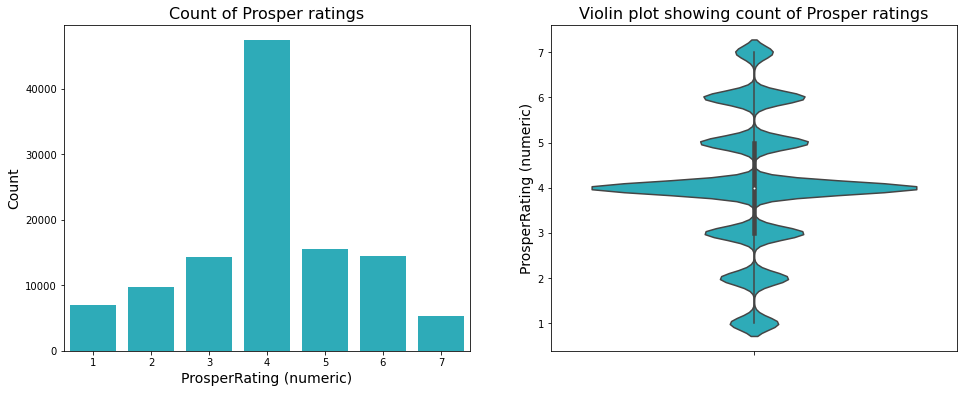

In [235]:
# Distribution of Prosper Rating (numeric)

plt.figure(figsize=(16, 6))
ProsperRating_numeric_order = cleaned_df['ProsperRating (numeric)'].value_counts().index

plt.subplot(1, 2, 1)
sns.countplot(data=cleaned_df, x='ProsperRating (numeric)', color=default_color);
plt.title('Count of Prosper ratings');
plt_plot_function(plt, 'Count of Prosper ratings','ProsperRating (numeric)', 'Count' )

plt.subplot(1, 2, 2)
sns.violinplot(data=cleaned_df, y='ProsperRating (numeric)', color=default_color);
plt_plot_function(plt, 'Violin plot showing count of Prosper ratings','', 'ProsperRating (numeric)' )


Majority of the borrowers have ProsperRating of 4

### Loan Term

Let us look at the distribution of toan Term and find out the most popular loan term by plot.

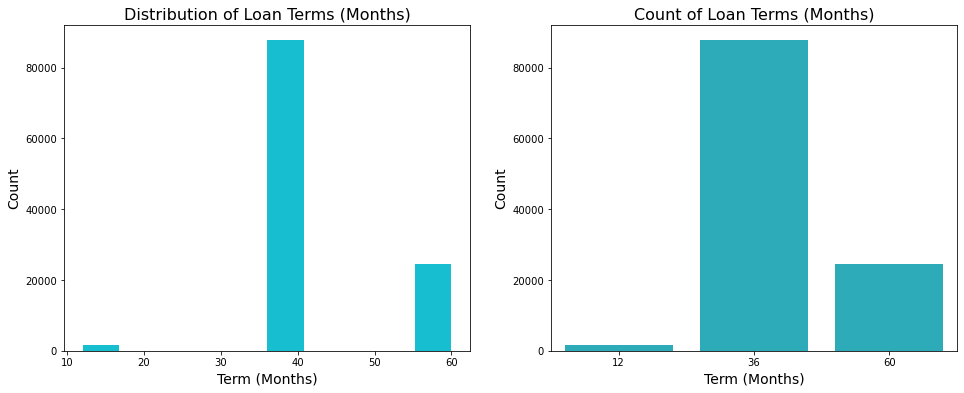

In [236]:
plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)

plt.hist(data=cleaned_df, x='Term', color=default_color);
plt_plot_function(plt, 'Distribution of Loan Terms (Months)','Term (Months)', 'Count' )


plt.subplot(1, 2, 2)
sns.countplot(data=cleaned_df, x='Term', color=default_color);
plt_plot_function(plt, 'Count of Loan Terms (Months)','Term (Months)', 'Count' )



Term is normally distributed. Most borrowers applied for 36 months loan

### Debt To Income Ratio

What is the distribution on DebtToIncomeRatio and what DebtToIncomeRatio is most common

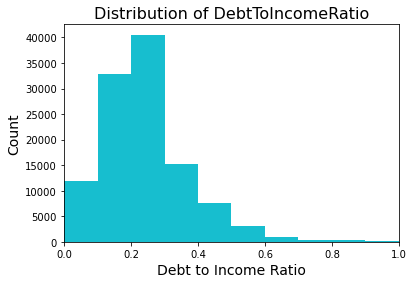

In [237]:
binsize =0.1
bins = np.arange(0, cleaned_df.DebtToIncomeRatio.max()+binsize, binsize);

plt.hist(data=cleaned_df, x='DebtToIncomeRatio', bins=bins, color=default_color);
plt_plot_function(plt, 'Distribution of DebtToIncomeRatio','Debt to Income Ratio', 'Count' );

plt.xlim(0, 1);

The distribution of DebtToIncomeRatio is right skewed. Most borrowers who applied for a loan have a debt to income ratio around 30%

## ListingCreationYear, ListingCreationMonth

Which month and year has the highest ListingCreation?

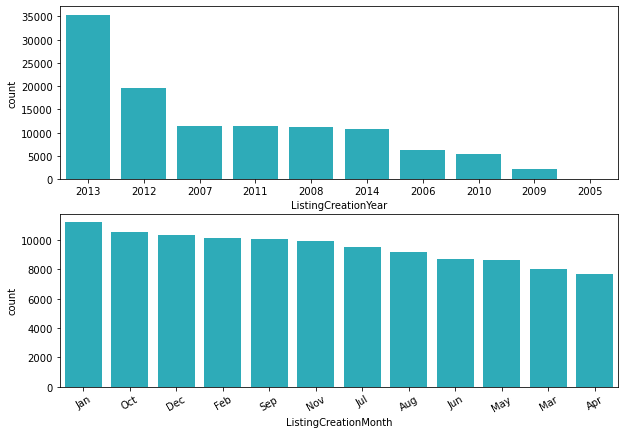

In [238]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 7));

ListingCreationYear_order = cleaned_df['ListingCreationYear'].value_counts().index
ListingCreationMonth_order = cleaned_df['ListingCreationMonth'].value_counts().index

sns.countplot(data=cleaned_df, x='ListingCreationYear', order=ListingCreationYear_order, color=default_color, ax=ax[0]);
sns.countplot(data=cleaned_df, x='ListingCreationMonth', order=ListingCreationMonth_order, color=default_color, ax=ax[1]);

plt.xticks(rotation=30);


More borrowers applied for loan January 2013.

## BorrowerRate

What is the distribution of BorrowerRate and what rate is the most common?

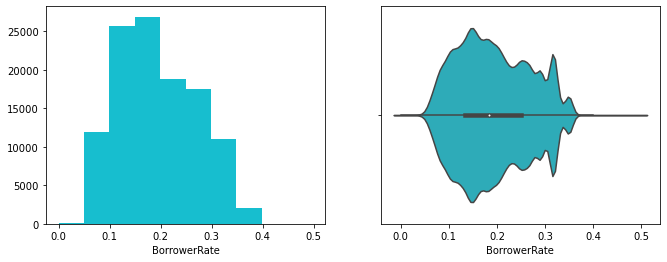

In [239]:
plt.figure(figsize=(11, 4))


plt.subplot(1, 2, 1)

plt.hist(data=cleaned_df, x='BorrowerRate', color=default_color);
plt.xlabel('BorrowerRate')

plt.subplot(1, 2, 2)
sns.violinplot(data=cleaned_df, x='BorrowerRate', color=default_color); 



BorrowerRate is right skewed. More people were offered interest rate of around 0.15 percent.

### BorrowerAPR

What is the distribution of BorrowerAPR and what rate is the most common?

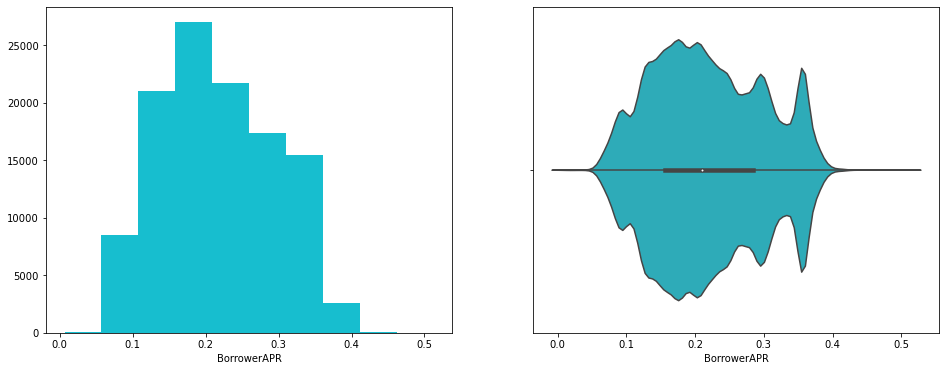

In [240]:
plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)

plt.hist(data=cleaned_df, x='BorrowerAPR', color=default_color);
plt.xlabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sns.violinplot(data=cleaned_df, x='BorrowerAPR', color=default_color); 

BorrowerAPR is right skewed. More people enjoyed Annual Percentage Rate of around 0.8 and 0.9 percent.

## LenderYield

What is the distribution of LenderYield and what rate is the most common?

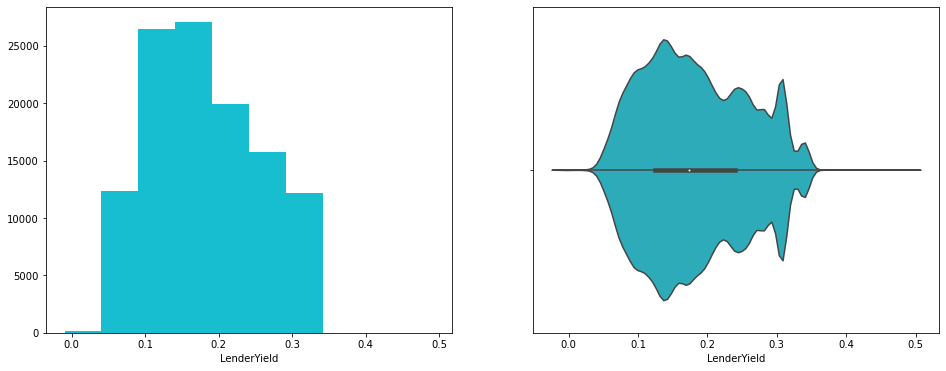

In [241]:
plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)

plt.hist(data=cleaned_df, x='LenderYield', color=default_color);
plt.xlabel('LenderYield')

plt.subplot(1, 2, 2)
sns.violinplot(data=cleaned_df, x='LenderYield', color=default_color); 

LenderYield is also right skewed. Most of the lenders had yield of around 0.12 and 0.14 percent.

### Loan Original Amount

What is the distribution of LoanOriginalAmount and what is the range of LoanOriginalAmount most borrowers applied for?

In [242]:
cleaned_df['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

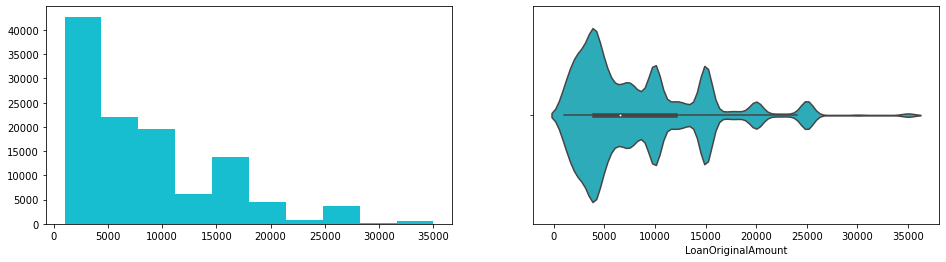

In [243]:
fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.hist(cleaned_df['LoanOriginalAmount'], color=default_color);

plt.subplot(1, 2, 2)
sns.violinplot(cleaned_df['LoanOriginalAmount'], color=default_color);

LoanOriginalAmount is right skewed and contains so many outliers. More borrowers applied for LoanOriginalAmount between 4600 and 4800

### Employment Status

What is the popularity of each of the EmploymentStatus?

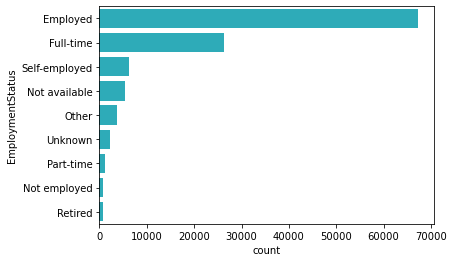

In [244]:
status_order = cleaned_df['EmploymentStatus'].value_counts().index
sns.countplot(data=cleaned_df, y='EmploymentStatus', order=status_order, color=default_color);

Majority of borrowers are employed, which is evident because it wouldnt be easy to get a loan without a job.

### Income Range

What IncomeRange is the most popular?

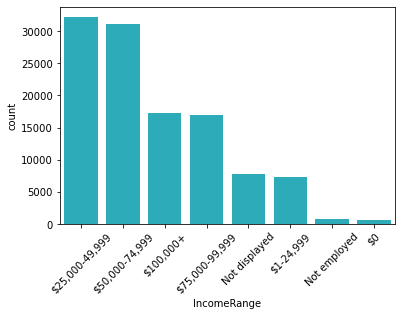

In [245]:
order = cleaned_df['IncomeRange'].value_counts().index
sns.countplot(data=cleaned_df, x='IncomeRange', order=order, color=default_color);
plt.xticks(rotation=45);

Borrowers within the income range $ 25,000-$ 49,999 has the highest count.

### Currently In Group

Let us see how the number of borrower that are CurrentlyInGroup compares to those that are not CurrentlyInGroup.

In [246]:
cleaned_df.CurrentlyInGroup.value_counts()

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

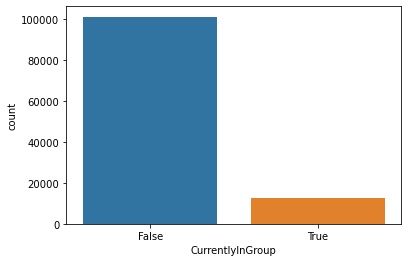

In [247]:
sns.countplot(data=cleaned_df, x='CurrentlyInGroup');

Just few number of borrowers were in the group at the time the listing was created.

### Is Borrower Home owner

How does the count of home owners differ from non home owners?

In [248]:
cleaned_df.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

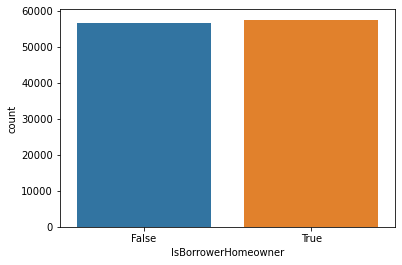

In [249]:
# Count home owners vs non home owners
sns.countplot(data=cleaned_df, x='IsBorrowerHomeowner');

No signifacance different in the number of borrowers who are home owners when compared to those who are not.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Term is normally distributed with peak at 36 months.

BorrowerRate, BorrowerAPR, LenderYield, LoanOriginalAmount, and DebtToIncomeRatio are all right skewed. No transformation was performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no unusual distribution. Hence, no need for transformation.

## Bivariate Exploration


## Selecting the numerical variables for correlation plot

Let us find out the relationships between pairs of the numerical variable 

In [250]:
numerical_vars = ['Term', 'DebtToIncomeRatio',
                 'LoanOriginalAmount', 'LenderYield', 'ProsperRating (numeric)',
                 'BorrowerAPR', 'BorrowerRate', 'ListingCreationYear']

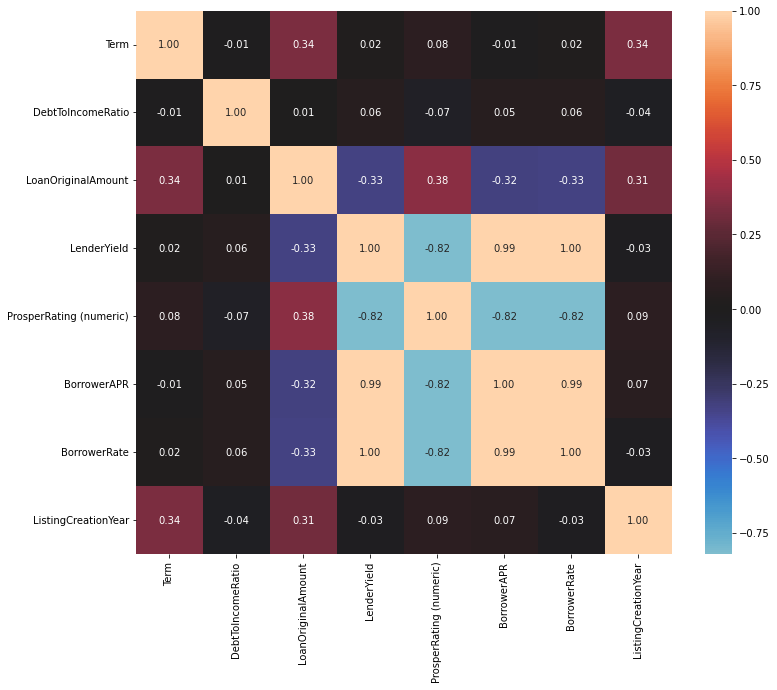

In [251]:
# Correlation Plot

plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_df[numerical_vars].corr(), annot = True, fmt='.2f', center=0);

The correlation plot above shows a strong positive relationship between the following pairs of variables:

1. LenderYield and BorrowerAPR: That is the lender gets more yield when the borrower's Annual Percentage Rate for the loan is high.

2. LenderYield and BorrowerRate: At the same time, the higher the loan's interest rate, the higher the lender yield. 

3. BorrowerAPR and BorrowerRate: This means that higher loan rate(monthly) will translate to higher Annual Percentage Rate

Conversely, there exist a strong negative relationship between the following pairs of variables

1. LenderYield and ProsperRating (numeric): This reveals that borrowers with higher ProsperRating (numeric) enjoys lower interest rate and hence result to lower LenderYield

2. ProsperRating (numeric) and BorrowerAPR: That is the higher the ProsperRating (numeric), the lower the BorrowerAPR.

3. ProsperRating (numeric) and BorrowerRate: Also, the higher the ProsperRating (numeric), the lower the BorrowerRate.

## Income Range vs Term

Does IncomeRange affect loan Term

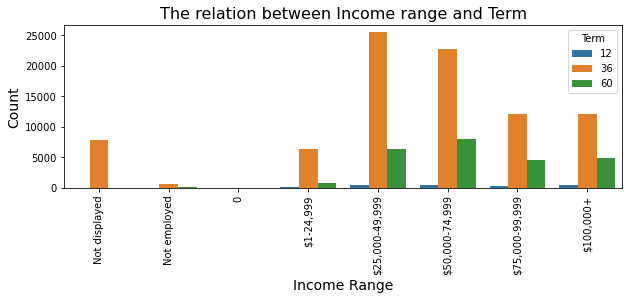

In [252]:
# set figure size
plt.figure(figsize=(10, 3))

income_order=["Not displayed","Not employed","0","$1-24,999","$25,000-49,999","$50,000-74,999","$75,000-99,999","$100,000+"]

income=pd.api.types.CategoricalDtype(ordered=True,categories=income_order)

# converting into a categorical feature
cleaned_df["IncomeRange"]=cleaned_df["IncomeRange"].astype(income)

sns.countplot(data=cleaned_df,x="IncomeRange",hue="Term");

#labels and title
plt_plot_function(plt, 'The relation between Income range and Term','Income Range', 'Count' )

plt.xticks(rotation=90);

In all income ranges people prefered to take a loan for 36 months.

## EmploymentStatus vs LoanOriginalAmount

Let us see whether EmploymentStatus affect amount of loan borrowers applied for.

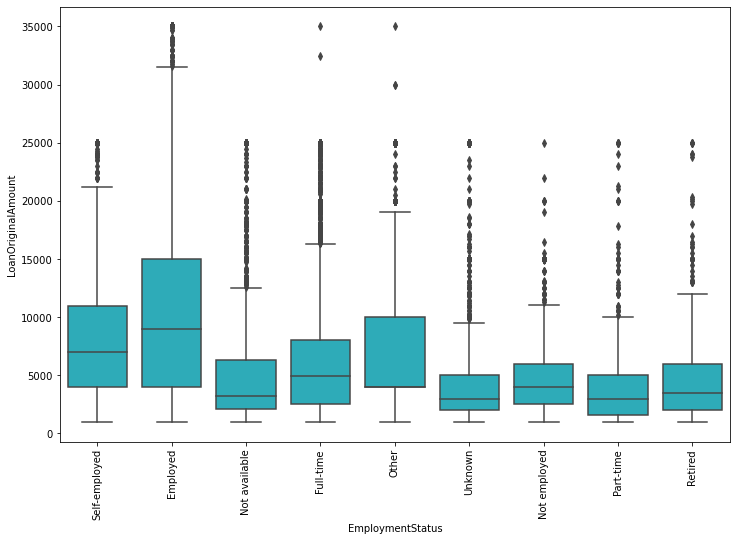

In [253]:
# set figure size
plt.figure(figsize=(12, 8))

sns.boxplot(data=cleaned_df, x='EmploymentStatus', y='LoanOriginalAmount', color=default_color);
plt.xticks(rotation=90);

Borrowers who are "employed" have the highest average LoanOriginalAmount.

## EmploymentStatus vs BorrowerAPR

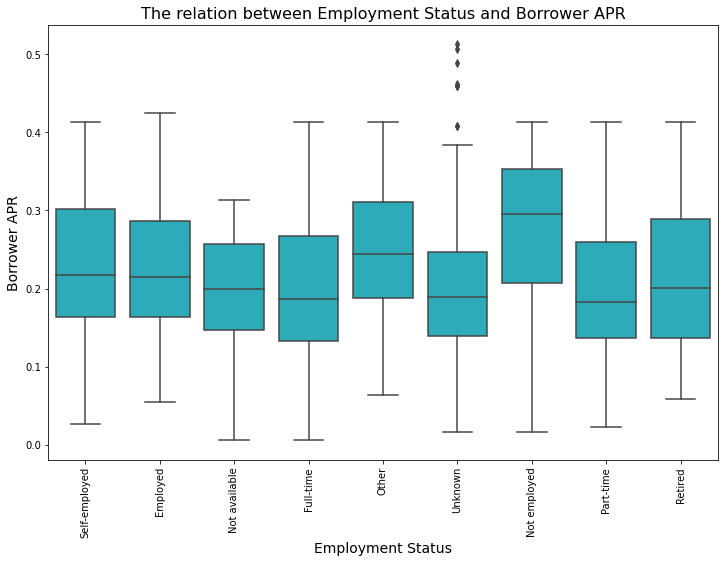

In [254]:
# set figure size
plt.figure(figsize=(12, 8));

sns.boxplot(data=cleaned_df, x='EmploymentStatus', y='BorrowerAPR', color=default_color);
plt.xticks(rotation=90);

plt_plot_function(plt, "The relation between Employment Status and Borrower APR",'Employment Status', 'Borrower APR' )

"Not employed" has a lighest median and part-time has the lowest median full-time has the widest range in the Borrower APR

## IncomeRange vs BorrowerRate

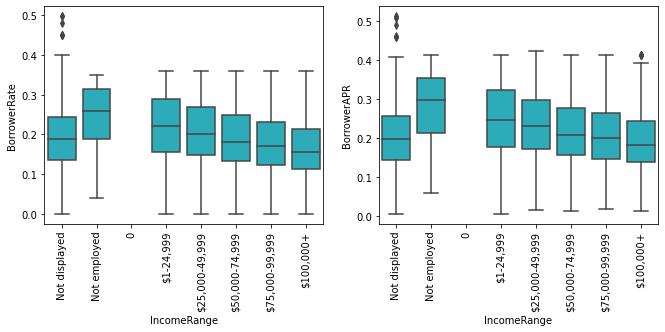

In [255]:
# set figure size
plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=cleaned_df, x='IncomeRange', y='BorrowerRate', color=default_color);
plt.xticks(rotation=90);

plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df, x='IncomeRange', y='BorrowerAPR', color=default_color);

plt.xticks(rotation=90);

Borrowers who are "Not Employed" have the highest Interest Rate and Annual Percentage Rate. This makes sense, as it will discourage them from applying.

## LoanOriginalAmount vs LenderYield

How doe increase in LoanOriginalAmount affect LenderYield?

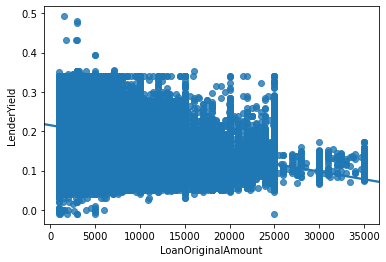

In [256]:
# normal plot
sns.regplot(data=cleaned_df, x='LoanOriginalAmount', y='LenderYield', truncate=False);

Due to a very large amount of points in the dataset, the visualization above is suffering from overplotting - a situation where a high amount of overlap in points makes it very difficult to see the actual relationship between the plotted variables. This can be overcome by introducing jitters and transparency. see the plot below. 

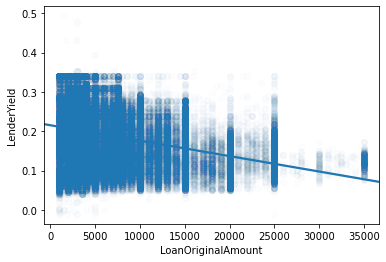

In [257]:
# regplot using jitters and tranparency
sns.regplot(data=cleaned_df, x='LoanOriginalAmount', y='LenderYield', truncate=False, scatter_kws={'alpha':0.01}, x_jitter=0.3);

There is a stronhg positive relationship between LoanOriginalAmount and MonthlyLoanPayment but a weak negative relationship between LoanOriginalAmount and LenderYield.  

## LoanOriginalAmount vs BorrowerRate

How doe increase in BorrowerRate  affect LoanOriginalAmount?

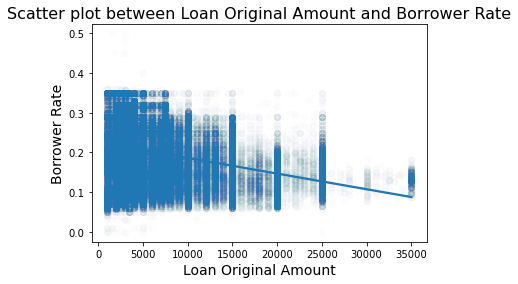

In [258]:
# regplot using jitters and tranparency

sns.regplot(data=cleaned_df, x='LoanOriginalAmount', y='BorrowerRate', scatter_kws={'alpha':0.008}, x_jitter=0.3);
plt_plot_function(plt, "Scatter plot between Loan Original Amount and Borrower Rate",'Loan Original Amount', 'Borrower Rate')


There is a weak negative relationship between LoanOriginalAmount and BorrowerRate.  

## BorrowerRate vs LenderYield and BorrowerAPR vs LenderYield 

Does increase in BorrowerRate and/or BorrowerAPR affect LenderYield?

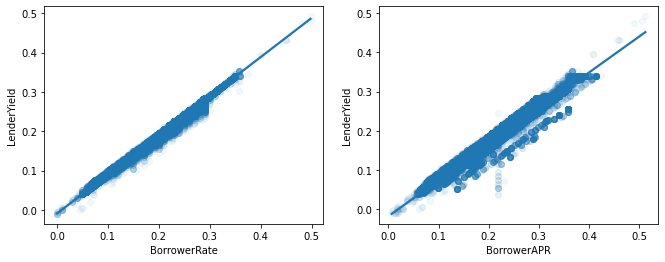

In [259]:
# regplot using tranparency
# set figure size
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
sns.regplot(data=cleaned_df, x='BorrowerRate', y='LenderYield', scatter_kws={'alpha':1/20});

plt.subplot(1, 2, 2)
sns.regplot(data=cleaned_df, x='BorrowerAPR', y='LenderYield', scatter_kws={'alpha':1/20});

Both BorrowerAPR and BorrowerRate have strong positive relationships with LenderYield.

## ProsperRating (numeric) vs BorrowerRate and ProsperRating (numeric) vs BorrowerAPR

Investigating further the relationship between ProsperRating (numeric) and each of BorrowerRate and BorrowerAPR

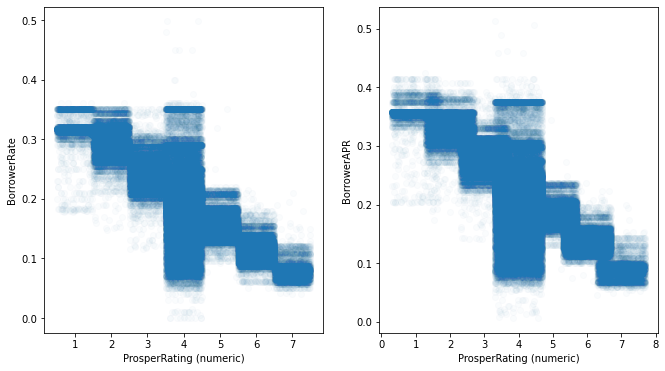

In [260]:
# set figure size
plt.figure(figsize=(11,6))

# regplot using jitters and tranparency 

plt.subplot(1, 2, 1)
sns.regplot(data=cleaned_df, x='ProsperRating (numeric)', y='BorrowerRate', x_jitter=0.5, scatter_kws={'alpha':1/50});

plt.subplot(1, 2, 2)
sns.regplot(data=cleaned_df, x='ProsperRating (numeric)', y='BorrowerAPR', x_jitter=0.7, scatter_kws={'alpha':1/50});

Each of BorrowerAPR and BorrowerRate have a strong negative relationships with ProsperRating (numeric).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



BorrowerRate and BorrowerAPR are strongly related positively.

When BorrowerRate or BorrowerAPR increases the lender yield increases also.

Each of BorrowerRate and BorrowerAPR has strong negative relationship with ProsperRating (numeric)

36 months loan term has the heighst frequency and wider Borrower APR range

People prefer to take loan with 36 months term and it is not dependent on the income range

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?



#### EmploymentStatus, LoanOriginalAmount and BorrowerRate
Borrowers who are "Employed" get higher LoanOriginalAmount. This means that they have been encouraged to apply for loan by giving them a lower interest rate, since BorrowerRate has a negative relation with LoanOriginalAmount.


Also, each of BorrowerAPR and BorrowerRate have a strong negative relationships with ProsperRating (numeric).


## Multivariate Exploration

## IncomeRange vs LoanOriginalAmount vs Term

How does IncomeRange affects LoanOriginalAmount for the different loan Term that exist?

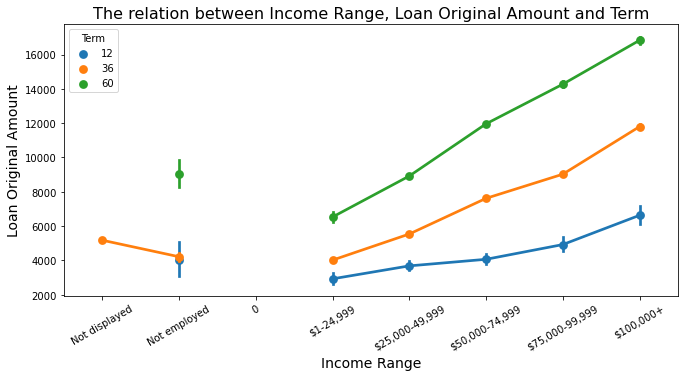

In [261]:
plt.figure(figsize=(11, 5));
           
sns.pointplot(data=cleaned_df,x='IncomeRange',y='LoanOriginalAmount',hue='Term');

plt_plot_function(plt, "The relation between Income Range, Loan Original Amount and Term",
                  'Income Range', 'Loan Original Amount')
           
plt.xticks(rotation=(30));

Borrowers without income could not apply for any loan. The higher the loan term for every category of IncomeRange, the higher the LoanOriginalAmount

## LoanStatus vs BorrowerAPR vs IsBorrowerHomeowner

Does LoanStatus affects BorrowerAPR for borrowers who are home owners when compare to those who are not home owners?

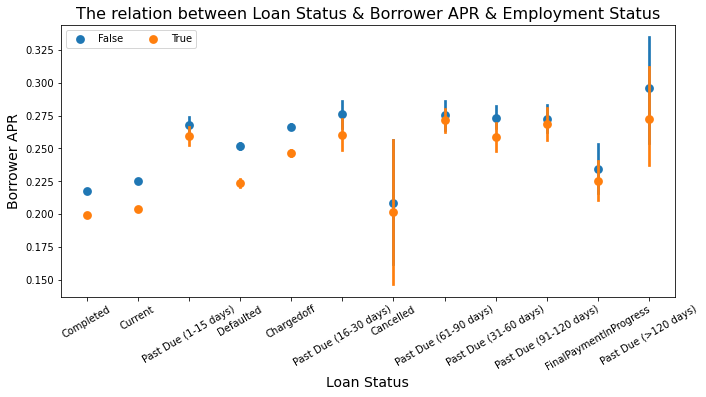

In [262]:
plt.figure(figsize=(11,5))

sns.pointplot(data=cleaned_df,x="LoanStatus",y="BorrowerAPR",hue="IsBorrowerHomeowner",linestyles="");
plt.xticks(rotation =30);
plt.legend(ncol=3);

plt_plot_function(plt, "The relation between Loan Status & Borrower APR & Employment Status",
                  'Loan Status', 'Borrower APR')



Generally, for every category of LoanStatus, borrowers who are home owners enjoy lower Borrower APR. 

## BorrowerRate vs LenderYield vs ProsperRating (numeric)

How ProsperRating (numeric) influenced lower  BorrowerRate and the effect on LenderYield

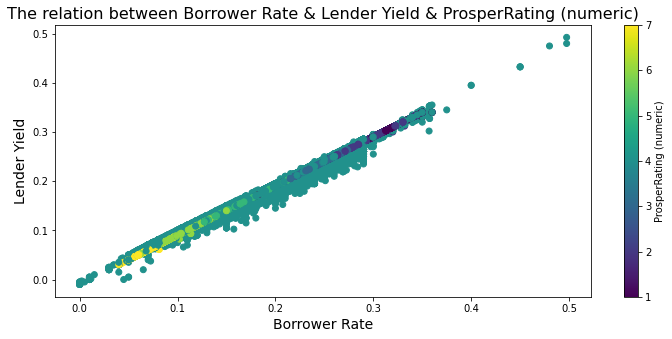

In [263]:
plt.figure(figsize=(12,5))
           
plt.scatter(data=cleaned_df,x='BorrowerRate',y = 'LenderYield', c='ProsperRating (numeric)')

plt_plot_function(plt, "The relation between Borrower Rate & Lender Yield & ProsperRating (numeric)",
                  'Borrower Rate', 'Lender Yield')

plt.colorbar(label='ProsperRating (numeric)');

Borrowers with higher ProsperRating (numeric) enjoy lower interest rate and this results to lower LenderYield

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The relationships show that the loans with higher borrower APR and Lender yield tends to had a lower ProsperRating (numeric).

People with a longest length of loan(Term) tend to get highest LoanOriginalAmount irrespective of their IncomeRange. 

Generally, for every category of LoanStatus, borrowers who are home owners enjoy lower Borrower APR.

### Were there any interesting or surprising interactions between features?

ProsperRating (numeric) influnced interest rate as well as Annual Percentage Rate of borrowers.



## Conclusions

Conclusively, it was obseved that BorrowerRate is right skewed with hingest rate around 0.18. It has a strong positive relationship with BorrowerAPR.

EmploymentStatus and ProsperRating (numeric) as well as Term affect BorrowerRate and consequently BorrowerAPR. It was observed that borrowers who were "Employed" were encouraged to take loan by giving them a lower interest rate. Same goes for borrowers who have higher ProsperRating (numeric). Aslo, the longer the length of loan, the lower the BorrowerRate and BorrowerAPR.


IsBorrowerHomeowner, EmploymentStatus, ProsperRating (numeric) affect LoanStatus.

36 months loan is the most popular.

January 2013 had the highest Listing Creation.

